## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [2]:
train = pd.read_csv("C:\\Users\\wwwaz\\Downloads\\Titanic\\train.csv")
test = pd.read_csv("C:\\Users\\wwwaz\\Downloads\\Titanic\\test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### PassengerId: A unique identifier for each passenger.
### Survived: Indicates whether the passenger survived (1) or did not survive (0).
### Pclass: Passenger class (1st, 2nd, or 3rd).
### Name: The name of the passenger.
### Sex: The gender of the passenger (male or female).
### Age: The age of the passenger.
### SibSp: The number of siblings or spouses traveling with the passenger.
### Parch: The number of parents or children traveling with the passenger.
### Ticket: The passenger's ticket number.
### Fare: The fare paid by the passenger for the ticket.
### Cabin: The cabin or room number where the passenger stayed.
### Embarked: The port at which the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).

In [4]:
## Statistical data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# number of unique attributes
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
# Calculating number of members in passenger's Family and adding it to the dataset
train['tot_family_memb'] = train['SibSp']+train['Parch']+1  #1 is the passenger himself

## Exploratory Data Analysis

C:\Users\wwwaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    549
1    342
Name: Survived, dtype: int64

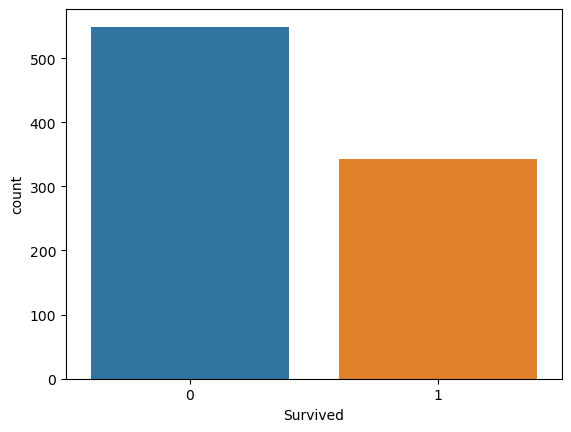

In [8]:
sns.countplot(train['Survived'])
train['Survived'].value_counts()

C:\Users\wwwaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    491
1    216
2    184
Name: Pclass, dtype: int64

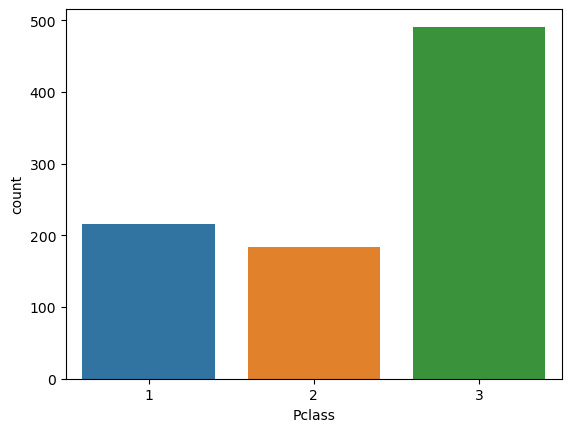

In [9]:
sns.countplot(train['Pclass'])
train['Pclass'].value_counts()

C:\Users\wwwaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


male      577
female    314
Name: Sex, dtype: int64

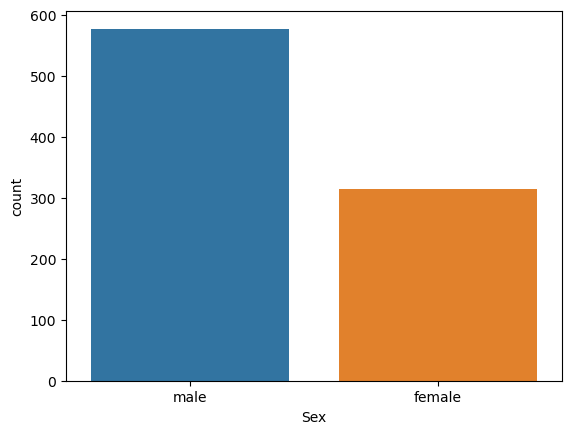

In [10]:
sns.countplot(train['Sex'])
train['Sex'].value_counts()

C:\Users\wwwaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

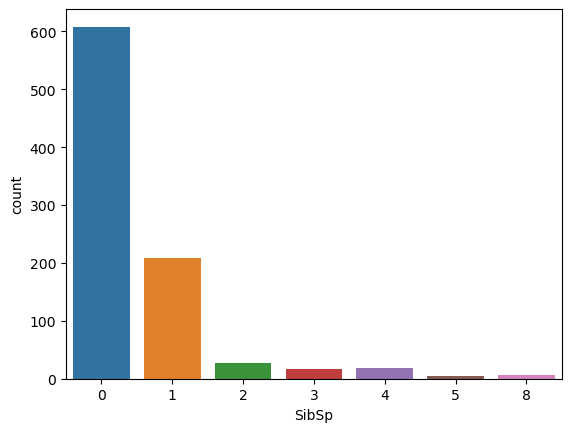

In [11]:
sns.countplot(train['SibSp'])
train['SibSp'].value_counts()

C:\Users\wwwaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

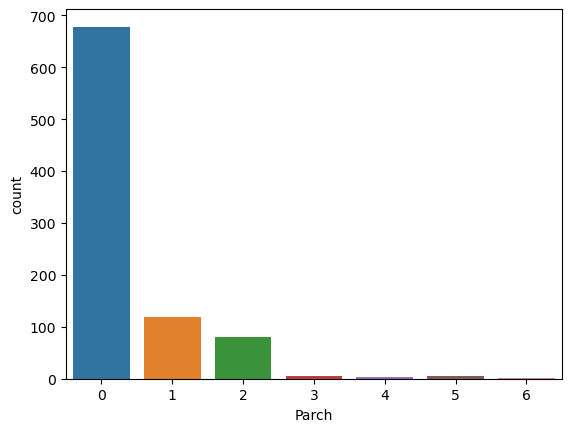

In [12]:
sns.countplot(train['Parch'])
train['Parch'].value_counts()

C:\Users\wwwaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


S    644
C    168
Q     77
Name: Embarked, dtype: int64

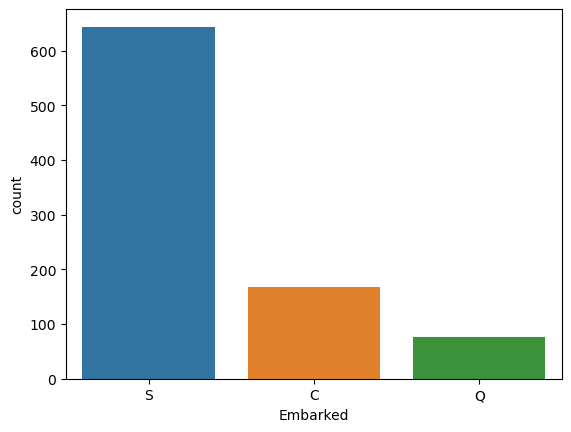

In [13]:
sns.countplot(train['Embarked'])
train['Embarked'].value_counts()

C:\Users\wwwaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

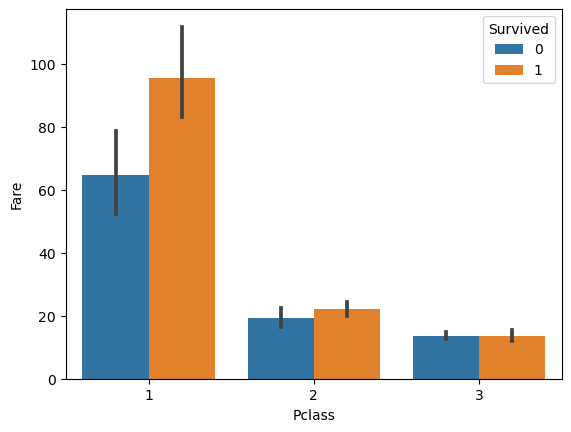

In [14]:
sns.barplot(train['Pclass'],train['Fare'],hue=train['Survived'])

C:\Users\wwwaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

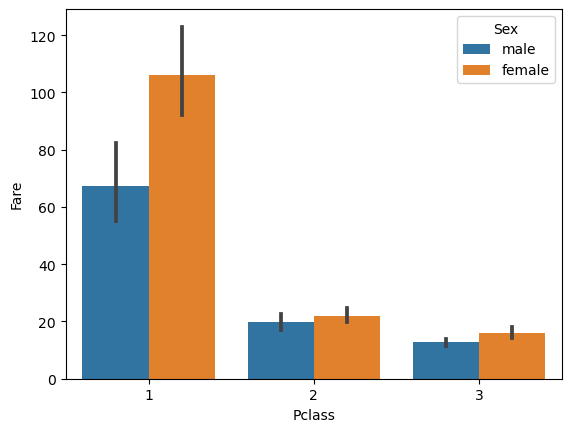

In [15]:
sns.barplot(train['Pclass'],train['Fare'],hue=train['Sex'])

C:\Users\wwwaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='tot_family_memb'>

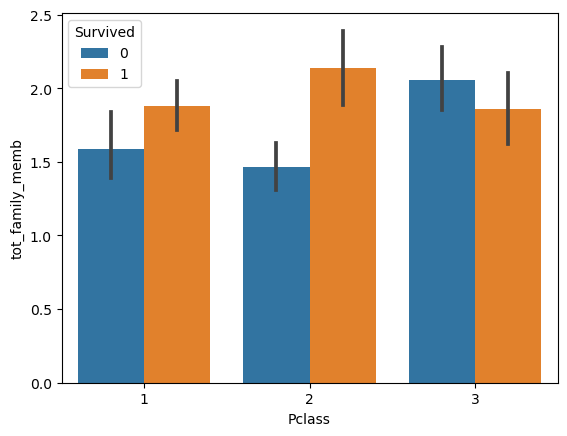

In [16]:
sns.barplot(train['Pclass'],train['tot_family_memb'],hue=train['Survived'])

In [17]:
pd.crosstab(train['Pclass'], train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [18]:
pd.crosstab(train['Embarked'],train['Pclass'])

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [19]:
pd.crosstab(train['Pclass'],train['Parch'])

Parch,0,1,2,3,4,5,6
Pclass,,,,,,,
1,163,31,21,0,1,0,0
2,134,32,16,2,0,0,0
3,381,55,43,3,3,5,1


C:\Users\wwwaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

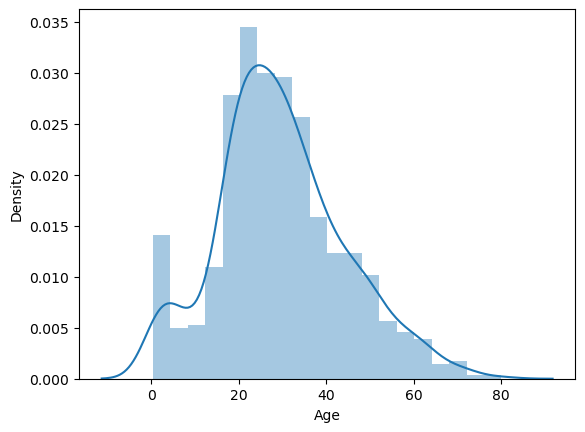

In [20]:
# For numerical Attributes
sns.distplot(train['Age'])

C:\Users\wwwaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

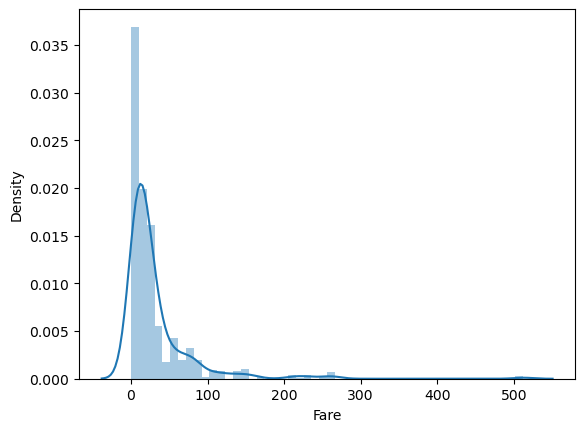

In [21]:
sns.distplot(train['Fare'])

C:\Users\wwwaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tot_family_memb', ylabel='Density'>

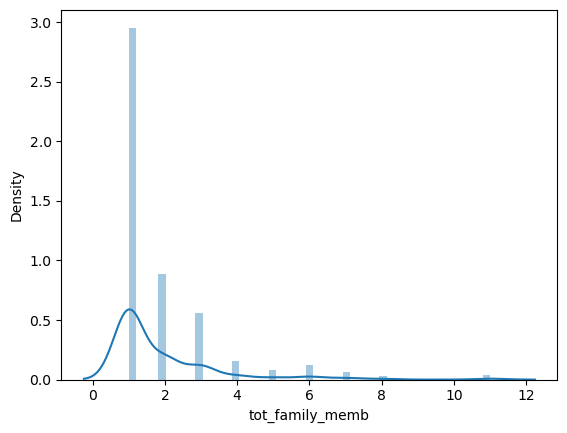

In [22]:
sns.distplot(train['tot_family_memb'])

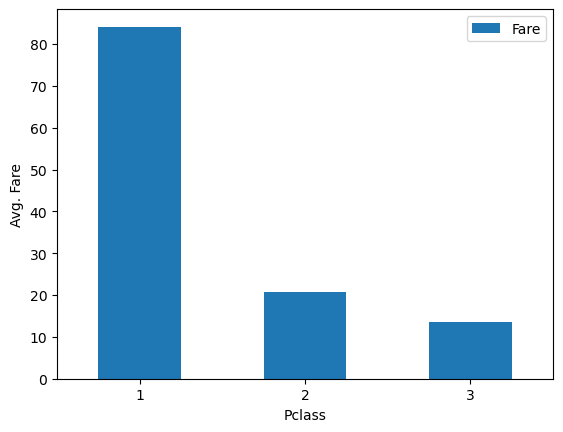

In [23]:
# Average fare paid by Passenger class
class_fare = train.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

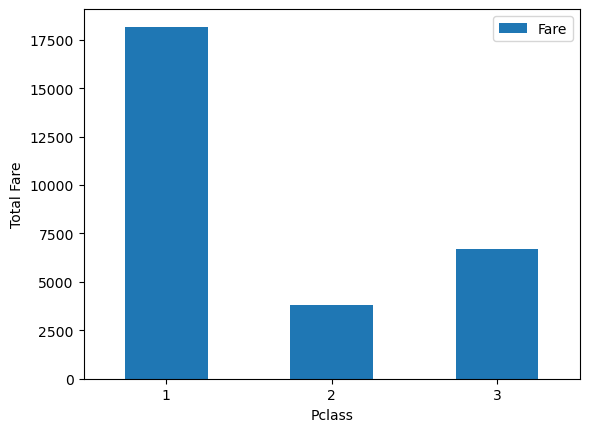

In [24]:
# Total fare paid by Passenger class
class_fare = train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

In [25]:
train['Embarked'].groupby(train['Sex']).value_counts()

Sex     Embarked
female  S           203
        C            73
        Q            36
male    S           441
        C            95
        Q            41
Name: Embarked, dtype: int64

In [26]:
train['Fare'].groupby(train['Pclass']).mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [27]:
train['Fare'].groupby(train['Pclass']).max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

## Data Preprocessing

In [28]:
# Finding the null values
# We have to join the datasets in order to find null values in both test and train data because it will be easier and in one step
# For joining two datasets we can do the following
# concatenating two pandas DataFrames, train and test, along the rows (axis 0). This is a common operation in data preprocessing
#when you want to combine two DataFrames with the same columns into a single DataFrame for further analysis or modeling.
#This line calculates the length (number of rows) of the train DataFrame and stores it in the variable train_len. 
#This can be useful if you want to later separate the concatenated DataFrame back into its original train and test portions.
train_len = len(train) 
df =pd.concat([train,test],axis=0)  #axis 0 is to concatinate row wise and if we use 1 we can concatinate columns wise
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tot_family_memb
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [29]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tot_family_memb
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,NaN


In [30]:
print(train.shape)
print(test.shape)
print(df.shape)

(891, 13)
(418, 11)
(1309, 13)


In [31]:
df.isna().sum()

PassengerId           0
Survived            418
Pclass                0
Name                  0
Sex                   0
Age                 263
SibSp                 0
Parch                 0
Ticket                0
Fare                  1
Cabin              1014
Embarked              2
tot_family_memb     418
dtype: int64

In [32]:
# Feature Selection - Dropping unnecessary columns
df = df.drop(columns=['Cabin'],axis=1)

In [33]:
# Filling missing values in numerical data like Age,tot_family_memb and Fare
df['Age']=df['Age'].fillna(df['Age'].mean())

In [34]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [35]:
df['tot_family_memb']=df['tot_family_memb'].fillna(df['tot_family_memb'].mean())

In [36]:
# Now Filling null values of Embarked collumn which is having Categorical Data,We'll be doing by using Mode function 
df['Embarked'].mode()[0]

'S'

In [37]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

C:\Users\wwwaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

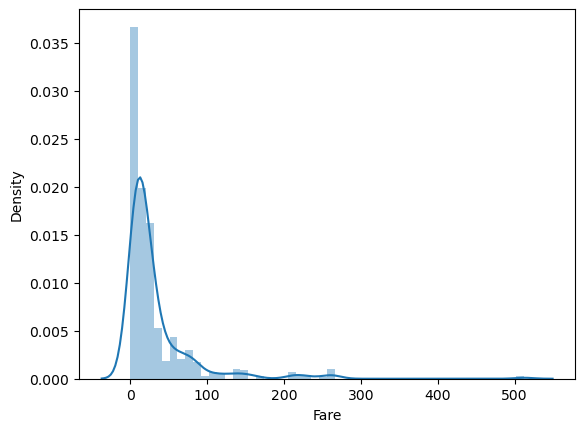

In [38]:
## Log transformation for uniformly distributing the data 
sns.distplot(df['Fare'])

In [39]:
df['Fare'] = np.log(df['Fare']+1)   # We add 1 because if fare is null it will throw an error,thus to avoid the error we use 1

C:\Users\wwwaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

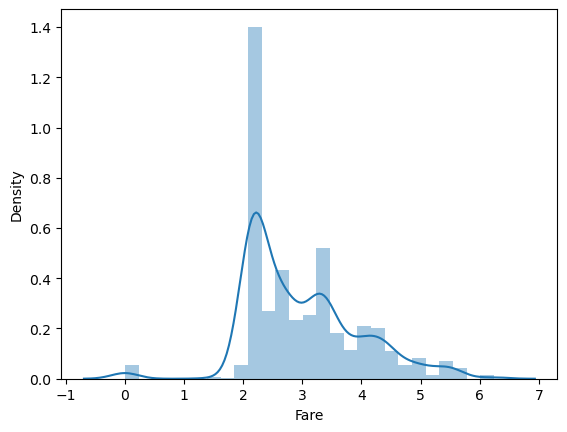

In [40]:
# Now the data in fare is uniformly distributed
sns.distplot(df['Fare'])

## Correlation Matrix

<AxesSubplot:>

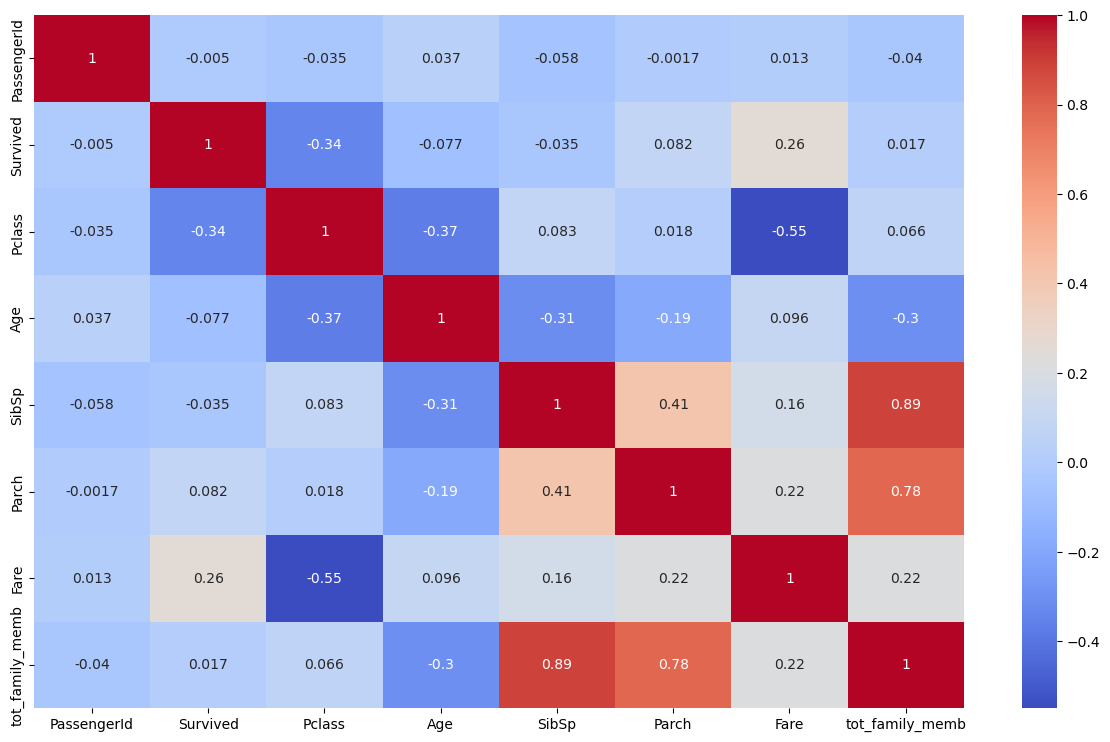

In [41]:
plt.figure(figsize=(15,9))
sns.heatmap(train.corr(),annot=True,cmap="coolwarm")

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,tot_family_memb
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,2.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,1.0


In [43]:
# Dropping unnecessary columns
df = df.drop(columns=['Name','Ticket'])

In [44]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,tot_family_memb
0,1,0.0,3,male,22.0,1,0,2.110213,S,2.0
1,2,1.0,1,female,38.0,1,0,4.280593,C,2.0
2,3,1.0,3,female,26.0,0,0,2.188856,S,1.0
3,4,1.0,1,female,35.0,1,0,3.990834,S,2.0
4,5,0.0,3,male,35.0,0,0,2.202765,S,1.0


In [45]:
# Converting string into integer through label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Embarked'] =le.fit_transform(df['Embarked'])
df['Sex'] =le.fit_transform(df['Sex'])

In [46]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,tot_family_memb
0,1,0.0,3,1,22.0,1,0,2.110213,2,2.0
1,2,1.0,1,0,38.0,1,0,4.280593,0,2.0
2,3,1.0,3,0,26.0,0,0,2.188856,2,1.0
3,4,1.0,1,0,35.0,1,0,3.990834,2,2.0
4,5,0.0,3,1,35.0,0,0,2.202765,2,1.0


## Train-Test Split

In [47]:
#train = df.iloc[:train_len, :]: This line uses the iloc method to select the first train_len rows 
#(which corresponds to the original train portion) of the concatenated DataFrame df. The colon : in the second position [:, :] 
#means that you're selecting all columns. So, this line creates a DataFrame called train that contains the rows from 
#the original train DataFrame.

#test = df.iloc[train_len:, :]: This line uses iloc again to select rows starting from the train_len index to the end of the 
#DataFrame,which corresponds to the original test portion of the data. Like in the previous line, all columns are selected,
#resulting in a DataFrame called test that contains the rows from the original test DataFrame.

train = df.iloc[:train_len,:]
test = df.iloc[train_len:,:]

In [48]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,tot_family_memb
0,1,0.0,3,1,22.0,1,0,2.110213,2,2.0
1,2,1.0,1,0,38.0,1,0,4.280593,0,2.0
2,3,1.0,3,0,26.0,0,0,2.188856,2,1.0
3,4,1.0,1,0,35.0,1,0,3.990834,2,2.0
4,5,0.0,3,1,35.0,0,0,2.202765,2,1.0


In [49]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,tot_family_memb
0,892,NaN,3,1,34.5,0,0,2.178064,1,1.904602
1,893,NaN,3,0,47.0,1,0,2.079442,2,1.904602
2,894,NaN,2,1,62.0,0,0,2.369075,1,1.904602
3,895,NaN,3,1,27.0,0,0,2.268252,2,1.904602
4,896,NaN,3,0,22.0,1,1,2.586824,2,1.904602


In [50]:
# Input split
x = train.drop(['PassengerId','Survived'],axis=1)
y = train['Survived']

In [51]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,tot_family_memb
0,3,1,22.0,1,0,2.110213,2,2.0
1,1,0,38.0,1,0,4.280593,0,2.0
2,3,0,26.0,0,0,2.188856,2,1.0
3,1,0,35.0,1,0,3.990834,2,2.0
4,3,1,35.0,0,0,2.202765,2,1.0


## Model Training

In [52]:
# Creating a function called classify,so that we dont need to train and fit again and again while testing
from sklearn.model_selection import train_test_split,cross_val_score
def classify(model):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)
    model.fit(x_train,y_train)
    print("Accuracy : ",model.score(x_test,y_test))
    
    score = cross_val_score(model,x,y,cv=5)
    print("CV score",score.mean())
    

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
classify(model)

Accuracy :  0.8116591928251121
CV score 0.7845144686460359


In [54]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier()
classify(model)

Accuracy :  0.7668161434977578
CV score 0.7721800263636934


In [55]:
from sklearn import svm
model = svm.SVC(kernel='linear',gamma='auto')
classify(model)

Accuracy :  0.7802690582959642
CV score 0.7878601468834348


In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy :  0.7982062780269058
CV score 0.8024919967359236


In [57]:
# Using Ensemble leaning bagging Technique
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(
  base_estimator = DecisionTreeClassifier(), #WE are using bagging tree
    n_estimators = 100,  #How many sample model to be created I choose 100 samples
    max_samples = 0.80,  # I am using 80% of total data for creating model samples
    oob_score = True,          # oob  -  out of bag - The data which didnt came in sampldatase
    random_state=0
)
classify(model)

Accuracy :  0.7937219730941704
CV score 0.8204695248258114


In [58]:
model = BaggingClassifier(
  base_estimator = RandomForestClassifier(), 
    n_estimators = 100,  
    max_samples = 0.80,  
    oob_score = True,         
    random_state=0
)
classify(model)

Accuracy :  0.8161434977578476
CV score 0.8294331805913


In [59]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy :  0.7847533632286996
CV score 0.7890465130876907


In [60]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy :  0.8116591928251121
CV score 0.8126043562864854


In [61]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

Accuracy :  0.8251121076233184
CV score 0.8237900947837551


##  Model Evaluation on test data

In [62]:
# Highest Accuracy I got in  training was using BaggingClassifier
model = BaggingClassifier(
  base_estimator = RandomForestClassifier(), 
    n_estimators = 100,  
    max_samples = 0.80,  
    oob_score = True,         
    random_state=0)
model.fit(x,y)

BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [63]:
# input split for test data
X_test = test.drop(['PassengerId','Survived'],axis=1)

In [64]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,tot_family_memb
0,3,1,34.5,0,0,2.178064,1,1.904602
1,3,0,47.0,1,0,2.079442,2,1.904602
2,2,1,62.0,0,0,2.369075,1,1.904602
3,3,1,27.0,0,0,2.268252,2,1.904602
4,3,0,22.0,1,1,2.586824,2,1.904602


In [65]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [66]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           891 non-null    int64  
 1   Sex              891 non-null    int32  
 2   Age              891 non-null    float64
 3   SibSp            891 non-null    int64  
 4   Parch            891 non-null    int64  
 5   Fare             891 non-null    float64
 6   Embarked         891 non-null    int32  
 7   tot_family_memb  891 non-null    float64
dtypes: float64(3), int32(2), int64(3)
memory usage: 55.7 KB


In [67]:
model.predict([[3,1,22,2,2,10,2,4]])

C:\Users\wwwaz\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [68]:
import pickle as pkl

In [69]:
# Taking the model with best Accuracy and converting it into a pickle folder with bytes,so that we can call it on our server.
# This will make a model.pkl file.Please then call it in your main.py using syntax  : model = pkl.load(open('model.pkl','rb'))
pkl.dump(BaggingClassifier,open('model.pkl','wb'))

NameError: name 'BaggingClassifirt' is not defined